In [25]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [26]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [27]:
# Save the input and target variables

data = diabetes_dataset["data"]
target = diabetes_dataset["target"]

In [28]:
# Normalise the target data (this will make clearer training curves)

target = (target - target.mean(axis=0)) / target.std()

In [29]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, target, test_size=0.1)

In [30]:
test_data.shape

(45, 10)

#### Train a feedforward neural network model

In [31]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [32]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [33]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [34]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100,
                   validation_split=0.15, batch_size=64)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 1s 4ms/sample - loss: 0.9504 - mae: 0.8277 - val_loss: 1.0385 - val_mae: 0.8959
Epoch 2/100
337/337 [==============================] - 0s 268us/sample - loss: 0.8493 - mae: 0.7769 - val_loss: 0.7902 - val_mae: 0.7675
Epoch 3/100
337/337 [==============================] - 0s 300us/sample - loss: 0.6710 - mae: 0.6707 - val_loss: 0.5623 - val_mae: 0.6255
Epoch 4/100
337/337 [==============================] - 0s 296us/sample - loss: 0.5801 - mae: 0.6164 - val_loss: 0.5010 - val_mae: 0.5500
Epoch 5/100
337/337 [==============================] - 0s 301us/sample - loss: 0.5251 - mae: 0.5842 - val_loss: 0.6146 - val_mae: 0.6583
Epoch 6/100
337/337 [==============================] - 0s 309us/sample - loss: 0.4891 - mae: 0.5775 - val_loss: 0.4900 - val_mae: 0.5340
Epoch 7/100
337/337 [==============================] - 0s 303us/sample - loss: 0.4827 - mae: 0.5553 - val_loss: 0.5033 - val_mae: 0.559

337/337 [==============================] - 0s 307us/sample - loss: 0.1201 - mae: 0.2659 - val_loss: 0.6008 - val_mae: 0.6047
Epoch 61/100
337/337 [==============================] - 0s 299us/sample - loss: 0.1371 - mae: 0.2932 - val_loss: 0.6860 - val_mae: 0.6442
Epoch 62/100
337/337 [==============================] - 0s 295us/sample - loss: 0.1281 - mae: 0.2751 - val_loss: 0.6599 - val_mae: 0.6641
Epoch 63/100
337/337 [==============================] - 0s 304us/sample - loss: 0.1505 - mae: 0.2966 - val_loss: 0.6482 - val_mae: 0.6538
Epoch 64/100
337/337 [==============================] - 0s 301us/sample - loss: 0.1443 - mae: 0.2996 - val_loss: 0.6076 - val_mae: 0.6246
Epoch 65/100
337/337 [==============================] - 0s 290us/sample - loss: 0.1296 - mae: 0.2805 - val_loss: 0.6265 - val_mae: 0.6327
Epoch 66/100
337/337 [==============================] - 0s 299us/sample - loss: 0.1069 - mae: 0.2487 - val_loss: 0.6202 - val_mae: 0.6392
Epoch 67/100
337/337 [=========================

In [35]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.0689194864696927, 0.7911833]

#### Plot the learning curves

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

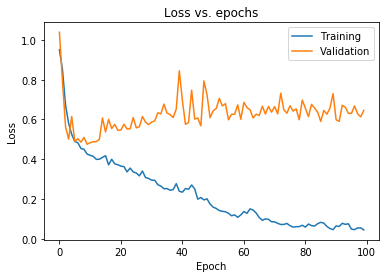

In [37]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [38]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [39]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd), input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [40]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 0.3)

In [41]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [42]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100,
                   validation_split=0.15, batch_size=64)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 2s 6ms/sample - loss: 0.9710 - mae: 0.8329 - val_loss: 1.1199 - val_mae: 0.9292
Epoch 2/100
337/337 [==============================] - 0s 309us/sample - loss: 0.9635 - mae: 0.8306 - val_loss: 1.1003 - val_mae: 0.9206
Epoch 3/100
337/337 [==============================] - 0s 321us/sample - loss: 0.9500 - mae: 0.8235 - val_loss: 1.0405 - val_mae: 0.8940
Epoch 4/100
337/337 [==============================] - 0s 313us/sample - loss: 0.8988 - mae: 0.7995 - val_loss: 0.8900 - val_mae: 0.8233
Epoch 5/100
337/337 [==============================] - 0s 538us/sample - loss: 0.8040 - mae: 0.7570 - val_loss: 0.6392 - val_mae: 0.6861
Epoch 6/100
337/337 [==============================] - 0s 327us/sample - loss: 0.6452 - mae: 0.6631 - val_loss: 0.5400 - val_mae: 0.5861
Epoch 7/100
337/337 [==============================] - 0s 310us/sample - loss: 0.6485 - mae: 0.6541 - val_loss: 0.5340 - val_mae: 0.596

337/337 [==============================] - 0s 312us/sample - loss: 0.3991 - mae: 0.5107 - val_loss: 0.5462 - val_mae: 0.5996
Epoch 61/100
337/337 [==============================] - 0s 536us/sample - loss: 0.3803 - mae: 0.4831 - val_loss: 0.5701 - val_mae: 0.6100
Epoch 62/100
337/337 [==============================] - 0s 306us/sample - loss: 0.3967 - mae: 0.4989 - val_loss: 0.5489 - val_mae: 0.5957
Epoch 63/100
337/337 [==============================] - 0s 313us/sample - loss: 0.4281 - mae: 0.5165 - val_loss: 0.5497 - val_mae: 0.5945
Epoch 64/100
337/337 [==============================] - 0s 310us/sample - loss: 0.3896 - mae: 0.5006 - val_loss: 0.5524 - val_mae: 0.6084
Epoch 65/100
337/337 [==============================] - 0s 305us/sample - loss: 0.3932 - mae: 0.5023 - val_loss: 0.5438 - val_mae: 0.5946
Epoch 66/100
337/337 [==============================] - 0s 322us/sample - loss: 0.3899 - mae: 0.4948 - val_loss: 0.5588 - val_mae: 0.6109
Epoch 67/100
337/337 [=========================

In [43]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7829070197211372, 0.72307825]

#### Plot the learning curves

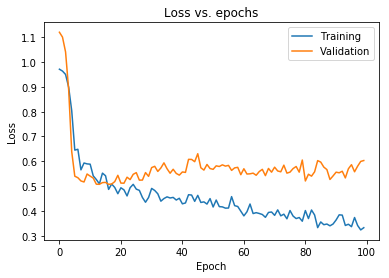

In [44]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [47]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Strating Training.........")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch : {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Starting batch : {batch}")
        
    def on_train_end(self, logs=None):
        print(f"Finishing Training!")

In [48]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)

In [49]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#### Train the model with the callback

In [50]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=5, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Strating Training.........
Starting epoch : 0
Starting batch : 0
Starting batch : 1
Starting batch : 2
Starting batch : 3
Starting epoch : 1
Starting batch : 0
Starting batch : 1
Starting batch : 2
Starting batch : 3
Starting epoch : 2
Starting batch : 0
Starting batch : 1
Starting batch : 2
Starting batch : 3
Starting epoch : 3
Starting batch : 0
Starting batch : 1
Starting batch : 2
Starting batch : 3
Starting epoch : 4
Starting batch : 0
Starting batch : 1
Starting batch : 2
Starting batch : 3
Finishing Training!


In [51]:
# Evaluate the model

model.evaluate(test_data, test_targets, verbose=False, callbacks=[TrainingCallback()])

[0.7809004174338446, 0.7548764]

In [54]:
# Make predictions with the model

model.predict(test_data, verbose=False, callbacks=[TrainingCallback()])

array([[ 0.29807225],
       [-0.14636168],
       [ 0.8492386 ],
       [ 0.23140438],
       [-0.08645414],
       [ 0.36470133],
       [ 0.36148918],
       [-0.15719137],
       [ 0.6428796 ],
       [ 0.6445428 ],
       [ 0.49701923],
       [ 0.19522853],
       [-0.01510165],
       [-0.14514235],
       [ 0.47990003],
       [ 0.12617745],
       [-0.15999874],
       [-0.15644954],
       [-0.1556562 ],
       [ 0.1727983 ],
       [ 0.32685268],
       [-0.15725204],
       [-0.13874526],
       [ 0.40723616],
       [ 0.36914188],
       [ 0.10244928],
       [-0.12577546],
       [ 0.3791263 ],
       [ 0.32285154],
       [ 0.21272412],
       [ 0.04415113],
       [ 0.7089966 ],
       [ 0.4510565 ],
       [-0.14140353],
       [-0.14560717],
       [-0.12105749],
       [-0.13025153],
       [ 0.3689917 ],
       [ 0.61148113],
       [ 0.3680104 ],
       [ 0.16623536],
       [ 0.06466784],
       [-0.01191748],
       [ 0.39545628],
       [-0.02291776]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [81]:
# Re-train the unregularised model

unreg_model = get_model()
unreg_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
unreg_history = unreg_model.fit(train_data, train_targets, epochs=100,
                validation_split=0.15, batch_size=64, verbose=False,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=4)])

In [82]:
# Evaluate the model on the test set

unreg_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.5725 - mae: 0.6170


[0.5655602600839403, 0.6169785]

In [83]:
# Re-train the regularised model

reg_model = get_regularised_model(1e-5, 0.3)
reg_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
reg_history = reg_model.fit(train_data, train_targets, epochs=100,
                validation_split=0.15, batch_size=64, verbose=False,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=4)])

In [84]:
# Evaluate the model on the test set

reg_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.6184 - mae: 0.6298


[0.62460841205385, 0.62984693]

#### Plot the learning curves

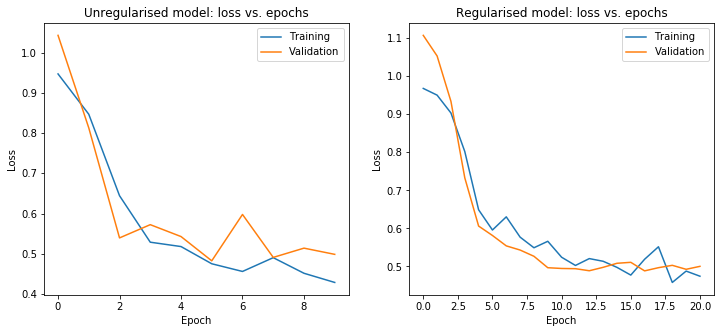

In [85]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()